<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-interactions-from-PDB-RNA-ligands-dataset" data-toc-modified-id="Analysis-of-interactions-from-PDB-RNA-ligands-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of interactions from PDB RNA-ligands dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Remove-non-standard-residues" data-toc-modified-id="Remove-non-standard-residues-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Remove non standard residues</a></span></li></ul></li><li><span><a href="#Histogram-of-distances" data-toc-modified-id="Histogram-of-distances-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Histogram of distances</a></span></li><li><span><a href="#Preferred-RNA-atoms-for-various-interactions" data-toc-modified-id="Preferred-RNA-atoms-for-various-interactions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preferred RNA atoms for various interactions</a></span></li><li><span><a href="#Statistics-of-interactions---tables" data-toc-modified-id="Statistics-of-interactions---tables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Statistics of interactions - tables</a></span></li><li><span><a href="#Generate-script-for-PyMOL-to-visualize-these-data" data-toc-modified-id="Generate-script-for-PyMOL-to-visualize-these-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Generate script for PyMOL to visualize these data</a></span></li></ul></li></ul></div>

# Analysis of interactions from PDB RNA-ligands dataset

In [1]:
# python prerequisities

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
%config Completer.use_jedi = False

sns.set(font_scale=2, style="ticks", rc={"axes.titlesize":24,"axes.labelsize":20, 'xtick.labelsize': 20, 'ytick.labelsize': 20})

In [2]:
# let's read the detailed interactions data

# generate it with SUMMARY/generate-full-data-file.sh

fulldata = pd.read_csv("SIFs_outputs/SUMMARY/DETAILED-all-data.tsv",
                       delimiter="\t",
                      index_col=0)  # header=None

fulldata.head(5)

,Ligand_name,Ligand_pose,Ligand_occurrence_in_sdf,Interaction,Ligand_Atom,Ligand_X,Ligand_Y,Ligand_Z,Receptor_Residue_Name,Receptor_Number,Receptor_Chain,Receptor_Atom,Receptor_X,Receptor_Y,Receptor_Z,Distance,PDB,LigandNumber
0,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
1,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
2,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
3,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
4,1AJU,1,1,HB,8,-4.054,-2.296,-1.685,A,22,A,N7,-4.333,0.639,-0.874,3.05774,1AJU,1


In [3]:
# for the initial dataset. All interactions counted, including those formed multiple time to the given residue
fulldata.groupby('Interaction')['Ligand_name'].count()

Interaction
CA                 904
HAL                  6
HB                5063
Ion-mediated       214
Lipophilic        3609
Pi_Anion            28
Pi_Cation           97
Pi_Stacking        146
Water-mediated     302
Name: Ligand_name, dtype: int64

### Remove non standard residues

In [4]:
# distanceData.groupby(['Receptor_Residue_Name']).count()['Ligand_name'].index
# ['1MA', '5BU', '5MU', '7MG', 'A', 'C', 'DA', 'DC', 'G', 'HOH', 'K', 'MG',
#        'MN', 'OMG', 'OMU', 'PB', 'PSU', 'SR', 'U', 'UR3'],

nonStandard = ['1MA', '5BU', '5MU', '7MG', 'DA', 'DC', 'OMG', 'OMU', 'PSU', 'SR', 'UR3']

# remove those defined as non standard
fulldata2 = fulldata[~fulldata['Receptor_Residue_Name'].isin(nonStandard)]

fulldata2

,Ligand_name,Ligand_pose,Ligand_occurrence_in_sdf,Interaction,Ligand_Atom,Ligand_X,Ligand_Y,Ligand_Z,Receptor_Residue_Name,Receptor_Number,Receptor_Chain,Receptor_Atom,Receptor_X,Receptor_Y,Receptor_Z,Distance,PDB,LigandNumber
0,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
1,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
2,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
3,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
4,1AJU,1,1,HB,8,-4.054,-2.296,-1.685,A,22,A,N7,-4.333,0.639,-0.874,3.05774,1AJU,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,4V8F,1,1,HB,4,3.951,210.818,13.180,U,1495,B,O4,3.359,213.771,12.488,3.09023,4V8F,1
57,4V8F,1,1,HB,4,3.951,210.818,13.180,U,1495,B,O4,3.359,213.771,12.488,3.09023,4V8F,1
58,4V8F,1,1,HB,4,3.951,210.818,13.180,C,1496,B,N4,3.733,211.846,9.460,3.86558,4V8F,1
59,4V8F,1,1,HB,4,3.951,210.818,13.180,C,1496,B,N4,3.733,211.846,9.460,3.86558,4V8F,1


In [5]:
# keep only data we need

distanceData = fulldata2[['PDB', 'Ligand_name', 'Interaction', 'Distance', 'Receptor_Atom', 'Receptor_Residue_Name']]

distanceData.head(5)

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name
0,1AJU,1AJU,HB,3.31267,O3',A
1,1AJU,1AJU,HB,3.31267,O3',A
2,1AJU,1AJU,HB,3.21237,N3,A
3,1AJU,1AJU,HB,3.21237,N3,A
4,1AJU,1AJU,HB,3.05774,N7,A


In [6]:
# dictionary of a human-friendly names of interactions

interactionDesc = {}
interactionDesc['Pi_Stacking'] = "Pi-stacking"
interactionDesc['Pi_Cation'] = "Pi-cation"
interactionDesc['HB'] = "Hydrogen bond"
interactionDesc['CA'] = "Cation-anion"
interactionDesc['Pi_Anion'] = "Pi-anion"
interactionDesc['HAL'] = "Halogen bond"
interactionDesc['Lipophilic'] = "Lipophilic"
interactionDesc['Water-mediated'] = "Water-mediated"
interactionDesc['Ion-mediated'] = "Ion-mediated"
# interactionDesc[''] = ""
# interactionDesc[''] = ""


# dictionary of a human friendly name of ions and other

ionsDict = {}

ionsDict['K'] = 'K ion'
ionsDict['MG'] = 'Mg ion'
# ionsDict['MN'] = ''
# ionsDict['PB'] = ''
# ionsDict['SR'] = ''

In [7]:
distanceData.groupby(['Receptor_Residue_Name']).count()

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom
Receptor_Residue_Name,,,,,
A,2427,2427,2427,2427,2427
C,2052,2052,2052,2052,2052
G,4086,4086,4086,4086,4086
HOH,151,151,151,151,151
K,64,64,64,64,64
MG,36,36,36,36,36
MN,2,2,2,2,2
PB,1,1,1,1,1
U,1476,1476,1476,1476,1476


In [8]:
# friendly names for interactions

distanceData['Interaction'] = distanceData['Interaction'].replace(interactionDesc)

distanceData['Receptor_Residue_Name'] = distanceData['Receptor_Residue_Name'].replace(ionsDict)

distanceData.head(4)

<ipython-input-8-d01bbb5cbcc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distanceData['Interaction'] = distanceData['Interaction'].replace(interactionDesc)
<ipython-input-8-d01bbb5cbcc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distanceData['Receptor_Residue_Name'] = distanceData['Receptor_Residue_Name'].replace(ionsDict)


,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name
0,1AJU,1AJU,Hydrogen bond,3.31267,O3',A
1,1AJU,1AJU,Hydrogen bond,3.31267,O3',A
2,1AJU,1AJU,Hydrogen bond,3.21237,N3,A
3,1AJU,1AJU,Hydrogen bond,3.21237,N3,A


In [9]:
# not-so-quick and dirty hack to rename ionic interactions

columns = [
    'PDB', 'Ligand_name', 'Interaction', 'Distance', 'Receptor_Atom', 'Receptor_Residue_Name',
    'Interaction2'
]


distanceData2 = pd.DataFrame(
    data=None,
    columns=columns,
)

for index, row in distanceData.iterrows():  #.itertuples():
    if row['Interaction'] == interactionDesc['Ion-mediated']:
        if len(row['Ligand_name']) >= 4:
            # normal ligand, not HOH or ion
            # Ligand <-> ion
            row['Interaction2'] = interactionDesc['Ion-mediated'] + " (" + row[
            'Receptor_Residue_Name'] + "): ligand-ion"
        else:
            # ion or HOH
            # ion <-> RNA
            row['Interaction2'] = interactionDesc['Ion-mediated'] + " (" + row[
            'Ligand_name'] + " ion): ion-RNA"
                
    elif row['Interaction'] == interactionDesc['Water-mediated']:
        if len(row['Ligand_name']) >= 4:
            # normal ligand, not HOH or ion
            # Ligand <-> hoh
            row['Interaction2'] = interactionDesc['Water-mediated'] + ": ligand-water"
        else:
            # hoh <-> RNA
            row['Interaction2'] = interactionDesc['Water-mediated'] + ": water-RNA"
          

    else:
        row['Interaction2'] = row['Interaction']
            
    distanceData2.loc[len(distanceData2)] = row

distanceData2

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction2
0,1AJU,1AJU,Hydrogen bond,3.31267,O3',A,Hydrogen bond
1,1AJU,1AJU,Hydrogen bond,3.31267,O3',A,Hydrogen bond
2,1AJU,1AJU,Hydrogen bond,3.21237,N3,A,Hydrogen bond
3,1AJU,1AJU,Hydrogen bond,3.21237,N3,A,Hydrogen bond
4,1AJU,1AJU,Hydrogen bond,3.05774,N7,A,Hydrogen bond
...,...,...,...,...,...,...,...
10290,4V8F,4V8F,Hydrogen bond,3.09023,O4,U,Hydrogen bond
10291,4V8F,4V8F,Hydrogen bond,3.09023,O4,U,Hydrogen bond
10292,4V8F,4V8F,Hydrogen bond,3.86558,N4,C,Hydrogen bond
10293,4V8F,4V8F,Hydrogen bond,3.86558,N4,C,Hydrogen bond


In [10]:
distanceData2[distanceData2['Interaction'] == interactionDesc['Ion-mediated']]

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction2
482,1F27,1F27,Ion-mediated,2.06075,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
483,1F27,MG,Ion-mediated,1.99300,OP2,A,Ion-mediated (MG ion): ion-RNA
751,1HNW,1HNW,Ion-mediated,2.05800,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
752,1HNW,MG,Ion-mediated,2.93710,O5',C,Ion-mediated (MG ion): ion-RNA
753,1HNW,1HNW,Ion-mediated,2.05800,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
...,...,...,...,...,...,...,...
8875,3SKR,MG,Ion-mediated,3.07730,OP2,A,Ion-mediated (MG ion): ion-RNA
10098,4V8A,4V8A,Ion-mediated,1.57770,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
10099,4V8A,MG,Ion-mediated,2.89160,O3',A,Ion-mediated (MG ion): ion-RNA
10119,4V8A,4V8A,Ion-mediated,1.57770,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion


In [11]:
# remove unnecesary columns and rename it again
distanceData3 = distanceData2.drop(['Interaction'], axis=1).rename(columns={'Interaction2': 'Interaction'})

distanceData3

,PDB,Ligand_name,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction
0,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
1,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
2,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
3,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
4,1AJU,1AJU,3.05774,N7,A,Hydrogen bond
...,...,...,...,...,...,...
10290,4V8F,4V8F,3.09023,O4,U,Hydrogen bond
10291,4V8F,4V8F,3.09023,O4,U,Hydrogen bond
10292,4V8F,4V8F,3.86558,N4,C,Hydrogen bond
10293,4V8F,4V8F,3.86558,N4,C,Hydrogen bond


## Histogram of distances

- ⚠️ here we will use ONLY canonical bases (A C G U)

In [12]:
# Let's remove unfrequent residues

desiredReceptorNames = ['A', 'C', 'G', 'U', 'Mg ion', 'K ion', 'Na ion', 'HOH']

distanceData4 = distanceData3[distanceData3['Receptor_Residue_Name'].isin(desiredReceptorNames)]

distanceData4.head(5)

,PDB,Ligand_name,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction
0,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
1,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
2,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
3,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
4,1AJU,1AJU,3.05774,N7,A,Hydrogen bond


In [13]:
# data summary
# partners of RNA

distanceData4.groupby(['Receptor_Residue_Name']).count()

,PDB,Ligand_name,Distance,Receptor_Atom,Interaction
Receptor_Residue_Name,,,,,
A,2427,2427,2427,2427,2427
C,2052,2052,2052,2052,2052
G,4086,4086,4086,4086,4086
HOH,151,151,151,151,151
K ion,64,64,64,64,64
Mg ion,36,36,36,36,36
U,1476,1476,1476,1476,1476


In [14]:
# data summary
# interactions detected

distanceData4.groupby(['Interaction'])['Distance'].describe().sort_values(by='count', ascending=False)

# lack of "symmetry" in ion-rna and ligand-ion (for MN and PB) resulting from removing modified residues earlier.

,count,mean,std,min,25%,50%,75%,max
Interaction,,,,,,,,
Hydrogen bond,5026.0,3.267559,0.415372,1.19585,2.912950,3.313600,3.637092,3.89943
Lipophilic,3582.0,3.528625,0.536733,1.33450,3.460725,3.693000,3.853450,3.99950
Cation-anion,899.0,4.323543,0.889922,2.42695,3.632100,4.603660,5.068630,5.49970
Water-mediated: ligand-water,151.0,2.844711,0.220643,2.03483,2.727780,2.863090,2.925830,3.39636
Water-mediated: water-RNA,151.0,2.976321,0.269733,2.30180,2.765100,2.945500,3.241150,3.48020
Pi-stacking,146.0,3.868544,0.409878,3.29114,3.606922,3.773750,4.033980,5.42357
Pi-cation,96.0,4.781580,0.685639,3.03880,4.470957,4.781740,5.315785,5.98758
Ion-mediated (K ion): ion-RNA,64.0,3.169092,0.307378,2.42790,3.010000,3.121950,3.315475,3.88770
Ion-mediated (K ion): ligand-ion,64.0,3.000108,0.277599,2.73901,2.801180,2.850705,3.240330,3.58197


In [15]:
# data of min-max distances to plot on the histograms
# taken directly from config.py

MIN_DIST = 0.5 # Minimum atoms distance
MAX_HB_DIST = 3.9 # Maximum Donor-Acceptor distance in Hydrogen Bond
MAX_HAL_DIST = 4.0 # Maximum Donor-Acceptor distance in Halogen Bond
MAX_CA_DIST = 5.5 # Maximum cation-anion distance in electrostatic interaction
PI_ION_DISTANCE = 6.0 # Maximum cation/anion - aromatic ring center distance
RING_RING_MAX = 5.5 # Aromatic rings' centroids maximum distance

MAX_ION_DIST = 3.9 # Maximum ligand's nitrogen/oxygen/sulphur atom - positively charged ion or residue's nitrogen/oxygen atom - positively charged ion distance
MAX_MAGNESIUM_DIST = 3.2 # Maximum ligand's nitrogen/oxygen/sulphur atom - magnesium or residue's nitrogen/oxygen atom - magnesium distance (Zheng et al., 2015)
MAX_POTASSIUM_DIST = 3.9 # Maximum ligand's nitrogen/oxygen/sulphur atom - potassium or residue's nitrogen/oxygen atom - potassium distance (Zheng et al., 2008)
MAX_SODIUM_DIST = 3.6 # Maximum ligand's nitrogen/oxygen/sulphur atom - sodium or residue's nitrogen/oxygen atom - sodium distance (Zheng et al., 2008)
MAX_OTHER_ION_DIST = 3.5 # Maximum ligand's nitrogen/oxygen/sulphur atom - other than magnesium/potassium/sodium ion or residue's nitrogen/oxygen atom - other than magnesium/potassium/sodium ion distance (Zheng et al., 2008)
MAX_WATER_DIST = 3.5 # Maximum ligand's hydrogen donors/acceptors - water molecule (oxygen) or nucleic acid's hydrogen donors/acceptors - water molecule (oxygen) distance (Poornima & Dean, 1995)
MAX_LIPOHILIC_DIST = 4.0 # Maximum ligand - residue lipophilic contact distance (Padroni et al., 2020)


In [16]:
# list of interactions
distanceData4.groupby(['Interaction'])['Distance'].count().sort_values(ascending=False).index

Index(['Hydrogen bond', 'Lipophilic', 'Cation-anion',
       'Water-mediated: ligand-water', 'Water-mediated: water-RNA',
       'Pi-stacking', 'Pi-cation', 'Ion-mediated (K ion): ion-RNA',
       'Ion-mediated (K ion): ligand-ion', 'Ion-mediated (MG ion): ion-RNA',
       'Ion-mediated (Mg ion): ligand-ion', 'Pi-anion', 'Halogen bond',
       'Ion-mediated (SR ion): ion-RNA', 'Ion-mediated (MN ion): ion-RNA',
       'Ion-mediated (PB ion): ion-RNA'],
      dtype='object', name='Interaction')

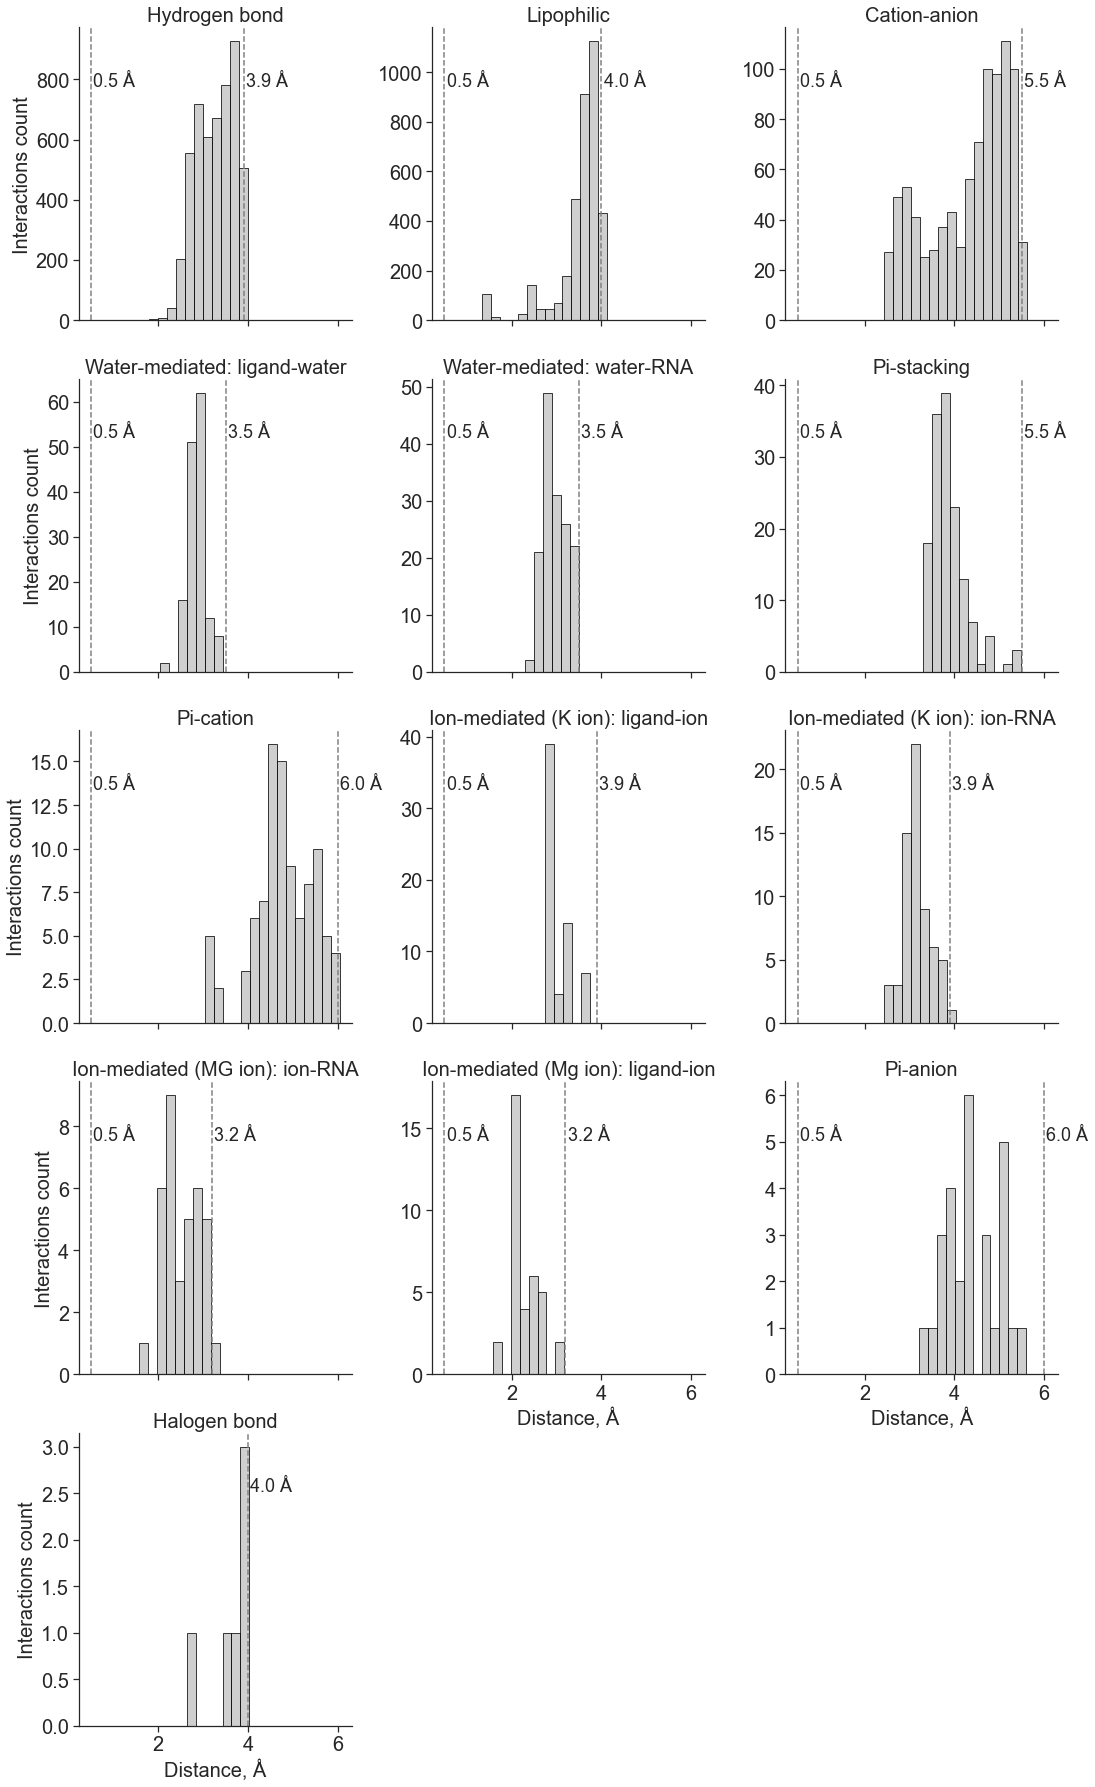

In [17]:
dataOrder = [
    'Hydrogen bond', 'Lipophilic', 'Cation-anion', 
    'Water-mediated: ligand-water', 'Water-mediated: water-RNA',
    'Pi-stacking', 
    'Pi-cation', 'Ion-mediated (K ion): ligand-ion',
       'Ion-mediated (K ion): ion-RNA', 'Ion-mediated (MG ion): ion-RNA',
       'Ion-mediated (Mg ion): ligand-ion', 'Pi-anion', 'Halogen bond',]

binwidth=0.2

def plotBoundary(axNo, value):
    ax = g.axes[axNo]
    ax.axvline(value, ls='--', color="gray")
    ax.text(value + 0.05,
            0.8 * ax.get_ylim()[1],
            "%.1f Å" % (value),
            fontsize=18)


g = sns.FacetGrid(distanceData4,
                  col="Interaction",
                  sharey=False,
                  col_wrap=3,
                  col_order = dataOrder,
                  height=5)
g.map_dataframe(sns.histplot,
                x="Distance",
                binwidth=binwidth,
                color='silver',
                edgecolor="black",
                linewidth=0.75)
# g.map_dataframe(sns.kdeplot,
#                 x="Distance",
#                 color='black', common_grid=False,
#                 linewidth=0.75)

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

g.set_axis_labels("Distance, Å", "Interactions count")

# lets draw vertical lines for min and max cutoff distances:
plotBoundary(0, MAX_HB_DIST)
plotBoundary(1, MAX_LIPOHILIC_DIST)
plotBoundary(2, MAX_CA_DIST)

plotBoundary(3, MAX_WATER_DIST)
plotBoundary(4, MAX_WATER_DIST)
plotBoundary(5, RING_RING_MAX)

plotBoundary(6, PI_ION_DISTANCE)
plotBoundary(7, MAX_POTASSIUM_DIST)
plotBoundary(8, MAX_POTASSIUM_DIST)

plotBoundary(9, MAX_MAGNESIUM_DIST)
plotBoundary(10, MAX_MAGNESIUM_DIST)
plotBoundary(11, PI_ION_DISTANCE)

plotBoundary(12, MAX_HAL_DIST)



for i in range(0, 12):
    plotBoundary(i, MIN_DIST)

In [18]:
# select only most frequent interactions

mostFrequentInteractions = [
    'Hydrogen bond', 'Lipophilic', 'Cation-anion', 'Pi-stacking', 
    ]

distanceData4mostFrequent = distanceData4[distanceData4['Interaction'].isin(mostFrequentInteractions)]


<AxesSubplot:xlabel='Distance', ylabel='Density'>

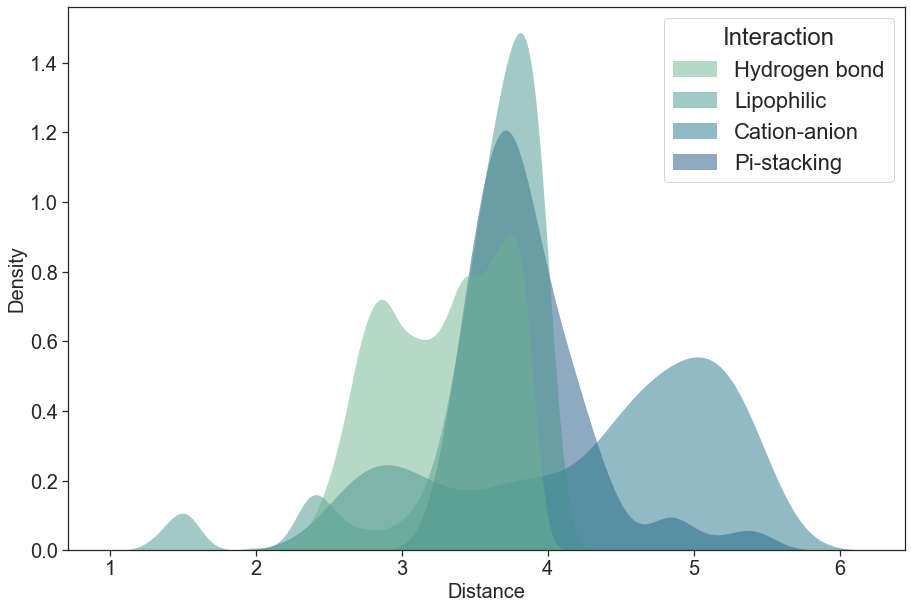

In [19]:
# nice looking, but not very useful :)

fig, ax = plt.subplots(figsize=(15, 10))

sns.kdeplot(
    ax=ax,
    data=distanceData4mostFrequent,
    x="Distance",
    hue="Interaction",
    fill=True,
    common_norm=False,
    palette="crest",
    alpha=.5,
    linewidth=0,
)

Text(0.5, 0, 'Distance, Å')

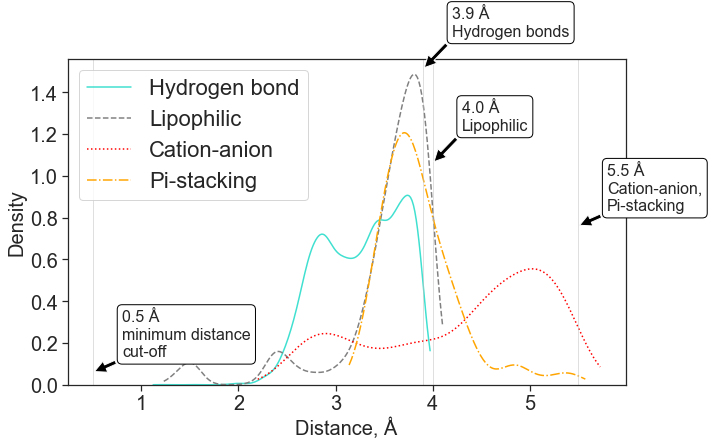

In [20]:
bbox_props = dict(boxstyle="round", fc="white", ec="black", lw=1)

def plotBoundary3(value, desc, hCorrection):
    ax.axvline(value, ls='-', color="silver", alpha=0.5, linewidth=1)
#     ax.text(value + 0.05,
#             ax.get_ylim()[1]-hCorrection,
#             "%.1f Å\n%s" % (value, desc),
#             fontsize=16)
    ax.annotate("%.1f Å\n%s" % (value, desc), (value, ax.get_ylim()[1]-hCorrection),
            xytext=(value+0.3, ax.get_ylim()[1]-hCorrection+0.3),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16, bbox=bbox_props,
            horizontalalignment='left', verticalalignment='top')

interactionColors = {} # pymol colors adjusted to matplotlib colors
interactionColors['Hydrogen bond'] = "turquoise"
interactionColors['Cation-anion'] = "red"
interactionColors['Halogen bond'] = "purple"
interactionColors['Lipophilic'] = "gray"
interactionColors['Pi-stacking'] = "orange"
interactionColors['Pi-cation'] = "green"
interactionColors['Pi-anion'] = "hotpink"
interactionColors['Water-mediated'] = "blue"
interactionColors['Ion-mediated'] = "salmon"

lineStyles = ["-", "--", ":", "-."]

fig, ax = plt.subplots(figsize=(10, 6))

for i, Interaction in enumerate(mostFrequentInteractions):

    sns.kdeplot(
        ax=ax,
        data=distanceData4mostFrequent[distanceData4mostFrequent.Interaction == Interaction],
        x="Distance",
        color=interactionColors[Interaction],
        common_norm=False,
        linestyle=lineStyles[i], cut=True
    )
    
plotBoundary3(MIN_DIST, "minimum distance\ncut-off", 1.5)
plotBoundary3(MAX_HB_DIST, "Hydrogen bonds", 0.05)
plotBoundary3(MAX_LIPOHILIC_DIST, "Lipophilic", 0.5)
plotBoundary3(MAX_CA_DIST, "Cation-anion,\nPi-stacking", 0.8)


ax.legend(labels=mostFrequentInteractions)
ax.set_xlabel("Distance, Å")


Text(0.5, 0, 'Distance, Å')

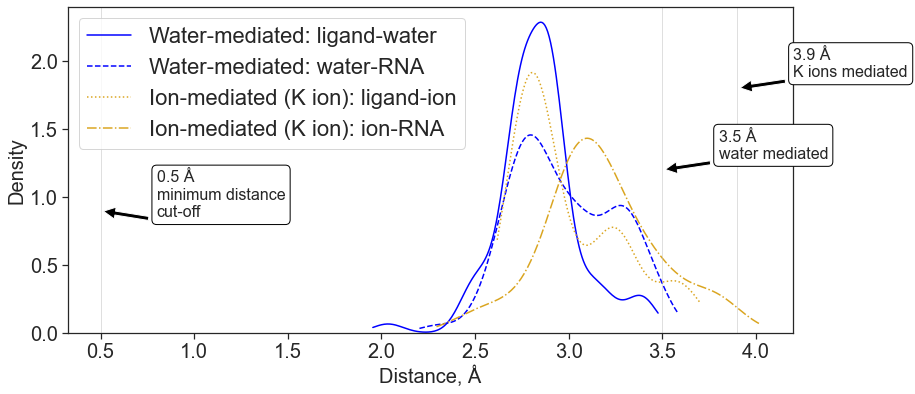

In [21]:
# for water and potassium

# ['Cation-anion', 'Halogen bond', 'Hydrogen bond',
#        'Ion-mediated (K ion): ligand-ion', 'Ion-mediated (K): ion-RNA',
#        'Ion-mediated (MG): ion-RNA', 'Ion-mediated (MN): ion-RNA',
#        'Ion-mediated (Mg ion): ligand-ion', 'Ion-mediated (PB): ion-RNA',
#        'Ion-mediated (SR): ion-RNA', 'Lipophilic', 'Pi-anion', 'Pi-cation',
#        'Pi-stacking', 'Water-mediated: ligand-water',
#        'Water-mediated: water-RNA'],
#       dtype='object', name='Interactio

interactionsWeWantHere = [
    'Water-mediated: ligand-water', 'Water-mediated: water-RNA', 
    'Ion-mediated (K ion): ligand-ion', 'Ion-mediated (K ion): ion-RNA'
    ]


colors = ['blue', 'blue', 'goldenrod', 'goldenrod']
lineStyles = ["-", "--", ":", "-."]

fig, ax = plt.subplots(figsize=(13, 6))

for i, Interaction in enumerate(interactionsWeWantHere):

    sns.kdeplot(
        ax=ax,
        data=distanceData4[distanceData4.Interaction == Interaction],
        x="Distance",
        color=colors[i],
        common_norm=False,
        linestyle=lineStyles[i], cut=True
    )
    
plotBoundary3(MIN_DIST, "minimum distance\ncut-off", 1.5)
plotBoundary3(MAX_POTASSIUM_DIST, "K ions mediated", 0.6)
plotBoundary3(MAX_WATER_DIST, "water mediated", 1.2)


ax.legend(labels=interactionsWeWantHere)
ax.set_xlabel("Distance, Å")


## Preferred RNA atoms for various interactions

⚠️ Still, only for canonical bases (and Mg, K, ions, and H2O)

In [22]:
# only for hydrogen bonds

distanceDataHB = distanceData4[distanceData4['Interaction'] == 'Hydrogen bond'].replace(r'\s*(.*?)\s*', r'\1', regex=True)
distanceDataLipo = distanceData4[distanceData4['Interaction'] == 'Lipophilic'].replace(r'\s*(.*?)\s*', r'\1', regex=True)

In [23]:
distanceDataHB.replace(r'\s*(.*?)\s*', r'\1', regex=True).groupby("Receptor_Atom").groups.keys()

dict_keys(['N1', 'N2', 'N3', 'N4', 'N6', 'N7', 'O2', "O2'", "O3'", 'O4', "O4'", "O5'", 'O6', 'OP1', 'OP2'])

In [24]:
distanceDataLipo.replace(r'\s*(.*?)\s*', r'\1', regex=True).groupby("Receptor_Atom").groups.keys()

dict_keys(["C1'", 'C2', "C2'", "C3'", 'C4', "C4'", 'C5', "C5'", 'C6', 'C8'])

In [25]:
# atomsOrder = ['OP1', 'OP2', "O2'", "O3'", "O4'", "O5'", 'N1', 'N2', 'N3', 'N4', 'N6', 'N7',
#               'O2', 'O4', 'O6']

atomsOrderNoBases = ['OP1', 'OP2', "O2'", "O3'", "O4'", "O5'"]

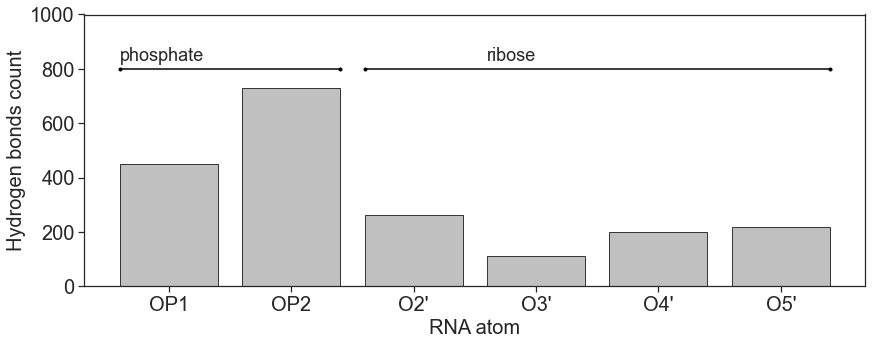

In [26]:
fig_dims = (14, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="Receptor_Atom",
              data=distanceDataHB,
              ax=ax,
              order=atomsOrderNoBases,
              color='silver',
              edgecolor="black",
              linewidth=0.75)

ax.set_ylabel('Hydrogen bonds count')
ax.set_xlabel('RNA atom')

ax.set_ylim(0, 1000)


def makeLine(start, stop, h, text, correction=0):
    plt.plot([start - 0.4, stop + 0.4], [h, h], marker=".", color="black")
    plt.text(start - 0.4 + correction,
             h + 30,
             text,
             fontsize=18,
             horizontalalignment='left')


h = 800
makeLine(0, 1, h, "phosphate")
makeLine(2, 5, h, "ribose", correction=1)
# makeLine(6, 14, h, "nucleobase", correction=3)

Preferences of RNA atoms to form hydrogen bonds

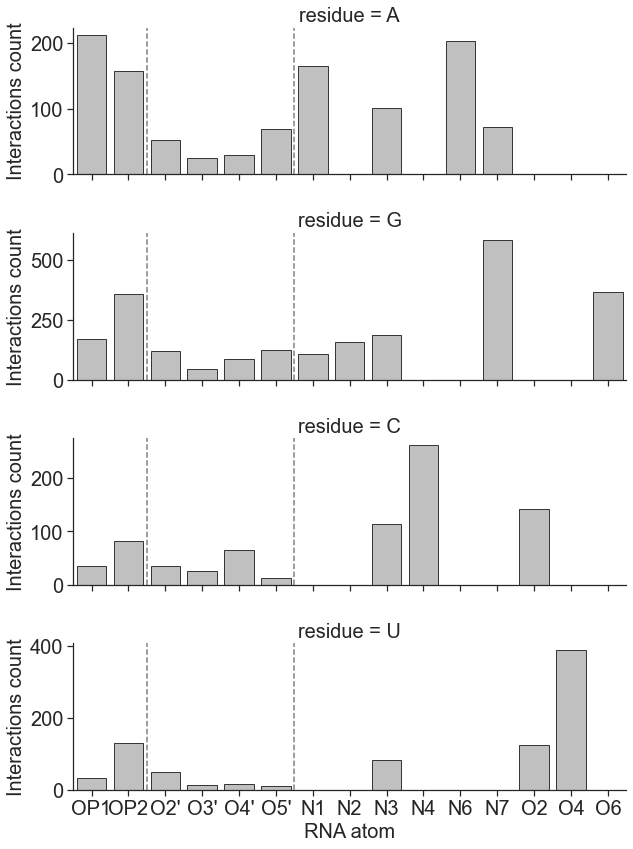

In [27]:
atomsOrderHB = [
    'OP1', 'OP2', "O2'", "O3'", "O4'", "O5'", 'N1', 'N2', 'N3', 'N4', 'N6',
    'N7', 'O2', 'O4', 'O6'
]


def plotBoundary2(axNo, value):
    ax = g.axes[axNo]
    ax.axvline(value, ls='--', color="gray")


def makeLine2(axNo, start, stop, h, text, correction=0):
    ax = g.axes[axNo]
    ax.plot([start - 0.4, stop + 0.4], [h, h], marker=".", color="black")
    ax.text(start - 0.4 + correction,
             h + 30,
             text,
             fontsize=18,
             horizontalalignment='left')


g = sns.FacetGrid(
    distanceDataHB.rename(columns={'Receptor_Residue_Name': 'residue'}),
    col="residue",
    sharey=False,
    col_wrap=1,
    col_order = ['A', 'G', 'C', 'U'],
    height=3,
    aspect=3)
g.map_dataframe(sns.countplot,
                x="Receptor_Atom",
                color='silver',
                order=atomsOrderHB,
                edgecolor="black",
                linewidth=0.75)

g.set_axis_labels("RNA atom", "Interactions count")

for axNo in range(0, 4):
    plotBoundary2(axNo, 1.5)
    plotBoundary2(axNo, 5.5)

# makeLine2(0, 0, 1, h, "phosphate")

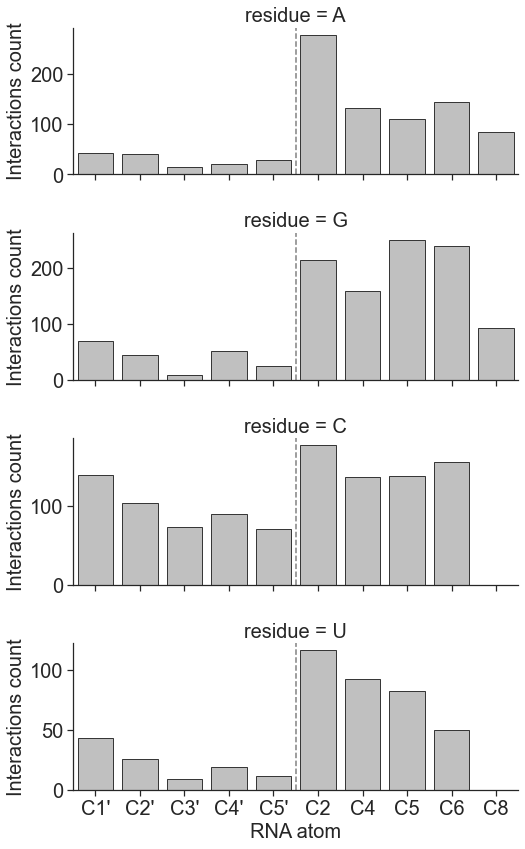

In [28]:
### For lipophilic

atomsOrderLipo = ["C1'", "C2'", "C3'", "C4'", "C5'", 'C2', 'C4', 'C5', 'C6', 'C8']

def plotBoundary2(axNo, value):
    ax = g.axes[axNo]
    ax.axvline(value, ls='--', color="gray")


g = sns.FacetGrid(
    distanceDataLipo.rename(columns={'Receptor_Residue_Name': 'residue'}),
    col="residue",
    sharey=False,
    col_wrap=1,
    col_order = ['A', 'G', 'C', 'U'],
    height=3,
    aspect=2.5)
g.map_dataframe(sns.countplot,
                x="Receptor_Atom",
                color='silver',
                order=atomsOrderLipo,
                edgecolor="black",
                linewidth=0.75)

g.set_axis_labels("RNA atom", "Interactions count")

for axNo in range(0, 4):
    plotBoundary2(axNo, 4.5)


## Statistics of interactions - tables

this is for distanceData4 - i.e., with non-standard residues removed.

In [29]:
# 'Hydrogen bond', 'Lipophilic', 'Cation-anion', 'Pi-stacking', 
# distanceDataLipo.groupby([ 'Receptor_Residue_Name', 'Receptor_Atom']).describe()

distanceData4[distanceData4['Interaction'] == 'Pi-stacking'].replace(
    r'\s*(.*?)\s*', r'\1',
    regex=True).groupby(['Receptor_Residue_Name', 'Receptor_Atom']).describe()

Distance                               \
                                           count      mean       std      min   
Receptor_Residue_Name Receptor_Atom                                             
A                     C4,C5,N7,C8,N9        16.0  4.065669  0.420450  3.49372   
                      N1,C2,N3,C4,C5,C6     43.0  3.850747  0.506086  3.35783   
C                     N1,C2,N3,C4,C5,C6     45.0  3.931858  0.244677  3.51372   
G                     C4,C5,N7,C8,N9         9.0  3.728742  0.231948  3.31474   
                      N1,C2,N3,C4,C5,C6     23.0  3.718450  0.430517  3.29114   
U                     N1,C2,N3,C4,C5,C6     10.0  3.815795  0.502369  3.38222   

                                                                               
                                              25%      50%       75%      max  
Receptor_Residue_Name Receptor_Atom                                            
A                     C4,C5,N7,C8,N9     3.749080  4.01143  4.318378  4.83704  
                      N1,C2,N3,C4,C5,C6  3.516035  3.69753  3.911045  5.41802  
C                     N1,C2,N3,C4,C5,C6  3.746240  3.90394  4.123220  4.41515  
G                     C4,C5,N7,C8,N9     3.635910  3.76118  3.812230  4.15277  
                      N1,C2,N3,C4,C5,C6  3.524030  3.62832  3.727960  5.42357  
U                     N1,C2,N3,C4,C5,C6  3.487070  3.73944  3.875555  5.12827

In [131]:
distanceStats = distanceData4.groupby('Interaction')['Distance'].describe().sort_values(by='count', ascending=False)
distanceStats

,count,mean,std,min,25%,50%,75%,max
Interaction,,,,,,,,
Hydrogen bond,5026.0,3.267559,0.415372,1.19585,2.912950,3.313600,3.637092,3.89943
Lipophilic,3582.0,3.528625,0.536733,1.33450,3.460725,3.693000,3.853450,3.99950
Cation-anion,899.0,4.323543,0.889922,2.42695,3.632100,4.603660,5.068630,5.49970
Water-mediated: ligand-water,151.0,2.844711,0.220643,2.03483,2.727780,2.863090,2.925830,3.39636
Water-mediated: water-RNA,151.0,2.976321,0.269733,2.30180,2.765100,2.945500,3.241150,3.48020
Pi-stacking,146.0,3.868544,0.409878,3.29114,3.606922,3.773750,4.033980,5.42357
Pi-cation,96.0,4.781580,0.685639,3.03880,4.470957,4.781740,5.315785,5.98758
Ion-mediated (K ion): ion-RNA,64.0,3.169092,0.307378,2.42790,3.010000,3.121950,3.315475,3.88770
Ion-mediated (K ion): ligand-ion,64.0,3.000108,0.277599,2.73901,2.801180,2.850705,3.240330,3.58197


Text(0.5, 1.0, 'Matplotlib bakery: A donut')

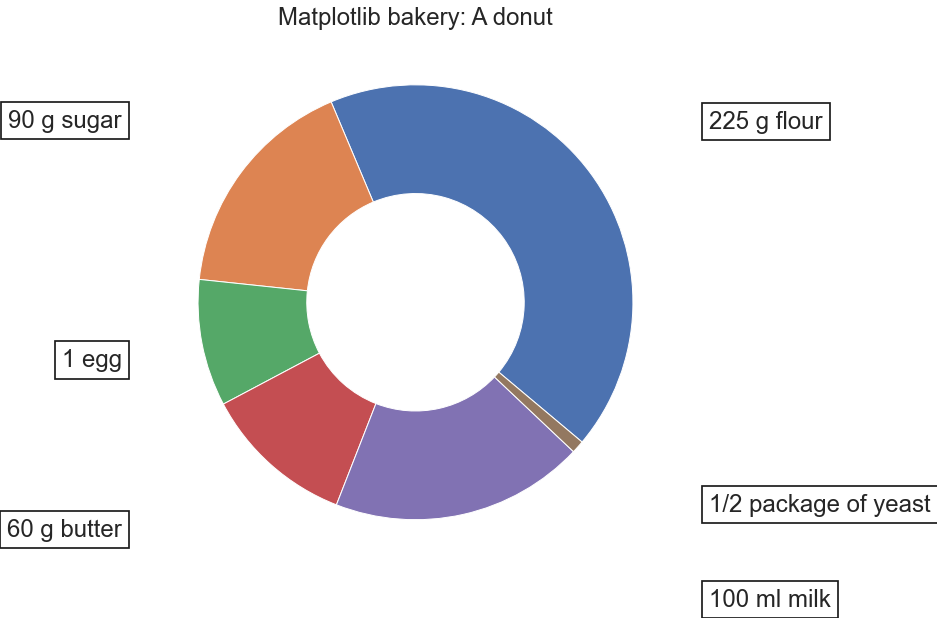

In [150]:
# distanceStats['count'].plot.pie(figsize=(10, 10), legend=True);

fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")


In [129]:
# number of structures with the given interaction

numberOfStructures = len(distanceData4.groupby(['PDB']))

print(numberOfStructures)

popularityStats = pd.DataFrame(
    distanceData4.groupby(['PDB',
                           'Interaction']).count()['Ligand_name'].groupby([
                               'Interaction'
                           ]).count().sort_values(ascending=False)).head(13)
popularityStats[
    'percentage of all structures'] = popularityStats / numberOfStructures * 100

popularityStats.rename(columns={'Ligand_name': 'Structures count'},
                       index={
                           'Ion-mediated (MG ion): ion-RNA':
                           'Ion-mediated (Mg ion)',
                           'Ion-mediated (K ion): ion-RNA':
                           'Ion-mediated (K ion)'
                       },
                       inplace=True)

popularityStats.drop(index=['Ion-mediated (Mg ion): ligand-ion', 'Ion-mediated (K ion): ligand-ion'], inplace=True)

popularityStats

207


,Structures count,percentage of all structures
Interaction,,
Hydrogen bond,206,99.516908
Lipophilic,196,94.685990
Cation-anion,127,61.352657
Pi-cation,66,31.884058
Pi-stacking,62,29.951691
Water-mediated: ligand-water,31,14.975845
Water-mediated: water-RNA,31,14.975845
Pi-anion,22,10.628019
Ion-mediated (Mg ion),16,7.729469


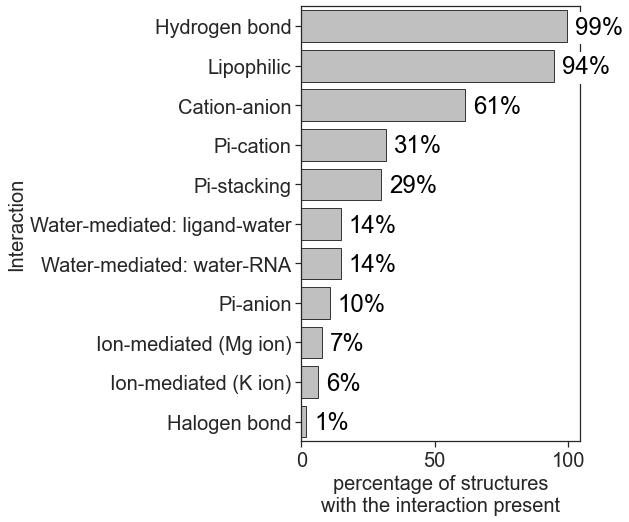

In [130]:
def show_values_on_bars(axs, h_v="v", space=2.9, ycorrection=-0.2):
    # https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() + ycorrection
                value = int(p.get_width())
                ax.text(_x, _y, str(value) + "%", ha="left", color="black", backgroundcolor="white")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

fig_dims = (5, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x="percentage of all structures", y=popularityStats.index, data=popularityStats,
                            color='silver',
                edgecolor="black",
                linewidth=0.75
            )

ax.set_ylabel('Interaction');
ax.set_xlabel('percentage of structures\nwith the interaction present');
show_values_on_bars(ax, "h")



In [48]:
# statistics - count - one interaction for residue-ligand (as wrapper works)

Receptor_Residue_Name_we_dont_want = ['HOH', 'K', 'MG', 'MN', 'PB', 'SR' ] # ions and HOH

fulldata_filtered = fulldata[~fulldata['Receptor_Residue_Name'].isin(Receptor_Residue_Name_we_dont_want)]

fulldata_filtered.groupby(by=['PDB', 'LigandNumber', 'Receptor_Chain', 'Receptor_Number', 'Interaction'])['Ligand_name'].count().groupby('Interaction').count().sort_values(ascending=False)

#.to_csv("PDB+tests-wtorek.tsv", sep="\t")

Interaction
HB                1371
Lipophilic         748
CA                 509
Pi_Stacking        109
Ion-mediated        83
Pi_Cation           78
Water-mediated      59
Pi_Anion            24
HAL                  4
Name: Ligand_name, dtype: int64

## Generate script for PyMOL to visualize these data

In [34]:
distanceData4.head(4)

,PDB,Ligand_name,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction
0,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
1,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
2,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
3,1AJU,1AJU,3.21237,N3,A,Hydrogen bond


In [35]:
# color dictionaries, consistent with pymol plugin
interactionColors = {}

interactionColors['Hydrogen bond'] = "marine"
interactionColors['Cation-anion'] = "red"
interactionColors['Halogen bond'] = "purple"
interactionColors['Lipophilic'] = "silver"
interactionColors['Pi-stacking'] = "orange"
interactionColors['Pi-cation'] = "green"
interactionColors['Pi-anion'] = "hotpink"
interactionColors['Water-mediated'] = "blue"
interactionColors['Ion-mediated'] = "salmon"

In [36]:
# filter input data - only canonical bases and only certain types of interactions

weWantTheseInPymol = [
    'Hydrogen bond', 'Cation-anion', 'Halogen bond', 'Lipophilic'
]

canonicalBases = ['A', 'G', 'C', 'U']

distance4filtered = distanceData4[
    (distanceData4['Receptor_Residue_Name'].isin(canonicalBases))
    & (distanceData4['Interaction'].isin(weWantTheseInPymol))]

distance4filtered.head(4)

,PDB,Ligand_name,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction
0,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
1,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
2,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
3,1AJU,1AJU,3.21237,N3,A,Hydrogen bond


In [37]:
# filter and group group by
grouped = distance4filtered.groupby(['Receptor_Residue_Name', 'Interaction'])

In [38]:
### loop over groups to compose pymol script


## pymol initial settings

scaleFactor = 2 # in Å for 100% occupancy
# pymolScript = "create A, resn A; create G, resn G; create U, resn U; create C, resn C;\n"
pymolScript = ""

for base in canonicalBases:
    for interaction in weWantTheseInPymol:
        pymolScript += "copy %s-%s, %s\n" % (base, interaction.replace(" ", "_"), base)


## loop over residues and interactions
for name, grupa in grouped:
    base, interaction = name
    print (name)
    
    ## loop over atoms
    grupaAtomow = grupa.groupby(['Receptor_Atom']).count() #['Interaction']
    minCount = min(grupaAtomow['Interaction'])
    maxCount = max(grupaAtomow['Interaction'])
    sumCount = sum(grupaAtomow['Interaction'])
    print (minCount, maxCount, sumCount)
    
    grupaAtomow['proc'] = grupaAtomow['Interaction'] / sumCount

    # loop over all atoms in this residue and interaction
   
    for atom, atomRow in grupaAtomow.iterrows():
        proc = atomRow['proc']
        pointName="ps-%s_%s" % (base, interaction.replace(" ", "_"))
        pymolScript += "pseudoatom %s, resn %s and name %s, color=%s, vdw=%.4f\n" % (pointName, base, atom, interactionColors[interaction], proc * scaleFactor)
        pymolScript += "label %s-%s and name %s, '%.1f%%'\n" % ( base, interaction.replace(" ", "_"), atom, proc*100)

        
        

        
# finish and save to script file

pymolScript += "show_as spheres, ps-*\n"
pymolScript += "set sphere_transparency, 0.3\nset label_size, 36\n"
pymolScript += "set label_bg_outline, true; set label_bg_color, silver; set label_connector, true; set label_connector_color, silver; set label_connector_mode, 0\n"
pymolScript += "set label_position,(-2,2,0)\n"

f = open( "pymol_commands.pml", 'w' )
f.write(pymolScript)
f.close()

('A', 'Cation-anion')
121 142 263
('A', 'Halogen bond')
1 1 1
('A', 'Hydrogen bond')
4 213 1089
('A', 'Lipophilic')
14 279 898
('C', 'Cation-anion')
41 55 96
('C', 'Halogen bond')
1 1 1
('C', 'Hydrogen bond')
3 227 772
('C', 'Lipophilic')
71 176 1079
('G', 'Cation-anion')
150 265 415
('G', 'Halogen bond')
1 2 4
('G', 'Hydrogen bond')
10 584 2306
('G', 'Lipophilic')
9 251 1156
('U', 'Cation-anion')
44 81 125
('U', 'Hydrogen bond')
3 388 859
('U', 'Lipophilic')
9 116 449
